In [2]:
import numpy as np
import matplotlib.pyplot as plt

# for reproducibility, fix the random seed
np.random.seed(42) 

In [3]:
class AvgFilter():
    
    def __init__(self):
        # num sample
        self.k = 0
    
        # initial Average value
        self.preAvg = 0
  
    def update(self, x):
        '''
        Args:
            x: new sample point
        '''
        self.k += 1 # add sample
        
        alpha = (self.k - 1) / self.k
        avg = alpha * self.preAvg + (1 - alpha)*x
                
        self.preAvg = avg # update preAvg
        return avg
    
    def init_memory(self):
        self.k = 0
        self.preAvg = 0

In [37]:
def GetVolt():
    w = 0 + 4*np.random.randn(1) # generate noise (avg, std) = (0, 4)
    z = 14.4 + w
    return z

In [38]:
# test (avg, std) = (0, 4)
# random sampling of 10,000 numbers from the population of standard normal distribution
random_mean = np.mean(4*np.random.randn(10000))
random_std = np.std(4*np.random.randn(10000))
print('Random sampling')
print(f'mean : {random_mean:.3f} | std : {random_std:.3f}')

Random sampling
mean : 0.055 | std : 3.990


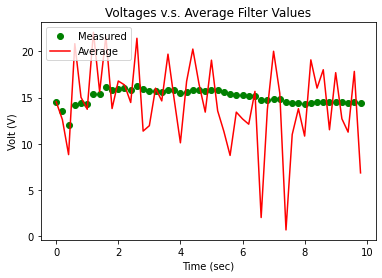

In [43]:
avgfilter = AvgFilter()

start_time = 0
end_time = 10
dt = 0.2 # time step
time = np.arange(start_time, end_time, dt)

Nsamples = len(time)
Avgsaved = np.zeros(Nsamples)
Xmsaved = np.zeros(Nsamples)

for idx in range(Nsamples):
    xm = GetVolt()
    avg = avgfilter.update(xm)
    
    Avgsaved[idx] = avg
    Xmsaved[idx] = xm

plt.plot(time, Avgsaved, 'go', label='Measured')
plt.plot(time, Xmsaved, 'r-', label='Average')
plt.legend(loc='upper left')
plt.xlabel('Time (sec)')
plt.ylabel('Volt (V)')
plt.title('Voltages v.s. Average Filter Values')    
plt.show()